In [1]:
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = np.load('dataset.npy')
training, test =  dataset[500:,:],dataset[:500,:]

In [3]:
inputs_ = tf.placeholder(tf.float32,[None,128,128,3])
targets_ = tf.placeholder(tf.float32,[None,128,128,3])

In [4]:
def lrelu(x,alpha=0.1):
    return tf.maximum(alpha*x,x)

In [5]:
inputs_ = tf.placeholder(dtype=tf.float32, shape=(None, 128, 128, 3))
with tf.name_scope('en-convolutions'):
    conv1 = tf.layers.conv2d(inputs_,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv1')
# Now (1, 128, 128, 32)
with tf.name_scope('en-pooling'):
    maxpool1 = tf.layers.max_pooling2d(conv1,pool_size=(3,3),strides=(3,3),name='pool1')
# Now (1, 42, 42, 32)
with tf.name_scope('en-convolutions'):
    conv2 = tf.layers.conv2d(maxpool1,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv2')
# Now (1, 42, 42, 32)
with tf.name_scope('encoding'):
    maxpool2 = tf.layers.max_pooling2d(conv2,pool_size=(3,3),strides=(3,3),name='pool2')
# Now (1, 14, 14, 32)
with tf.name_scope('en-convolutions'):
    conv3 = tf.layers.conv2d(maxpool2,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv3')
# Now (1, 14, 14, 32)
with tf.name_scope('encoding'):
    encoded = tf.layers.max_pooling2d(conv3,pool_size=(3,3),strides=(3,3),name='encoding')
# Now (1, 4, 4, 32)

W0513 17:39:15.082990 140554026796864 deprecation.py:323] From <ipython-input-5-f5707f0c0acb>:3: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0513 17:39:15.086661 140554026796864 deprecation.py:506] From /home/direwolf/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0513 17:39:15.487082 140554026796864 deprecation.py:323] From <ipython-input-5-f5707f0c0acb>:6: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [6]:
### Decoder
with tf.name_scope('decoder'):
    conv4 = tf.layers.conv2d(encoded,filters=32,kernel_size=(3,3),strides=(1,1),name='conv4',padding='SAME',use_bias=True,activation=lrelu)
#Now (1, 4, 4, 32)        
    upsample1 = tf.layers.conv2d_transpose(conv4,filters=32,kernel_size=5,padding='valid',strides=3,name='upsample1')
# Now (1, 14, 14, 32)
    upsample2 = tf.layers.conv2d_transpose(upsample1,filters=32,kernel_size=3,padding='same',strides=3,name='upsample2')
# Now (1, 42, 42, 32)
    upsample3 = tf.layers.conv2d_transpose(upsample2,filters=32,kernel_size=5,padding='valid',strides=3,name='upsample3')
# Now (1, 128, 128, 32)
    logits = tf.layers.conv2d(upsample3,filters=3,kernel_size=(3,3),strides=(1,1),name='logits',padding='SAME',use_bias=True)
#Now (1, 128, 128, 3)
# Pass logits through sigmoid to get reconstructed image
    decoded = tf.sigmoid(logits,name='recon')

W0513 17:39:15.751259 140554026796864 deprecation.py:323] From <ipython-input-6-e0897d33c6a6>:5: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [7]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)

learning_rate=tf.placeholder(tf.float32)
cost = tf.reduce_mean(loss)  #cost
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) #optimizer

W0513 17:39:16.610348 140554026796864 deprecation.py:323] From /home/direwolf/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 1/50... Training loss: 0.6929 Validation loss: 0.6928


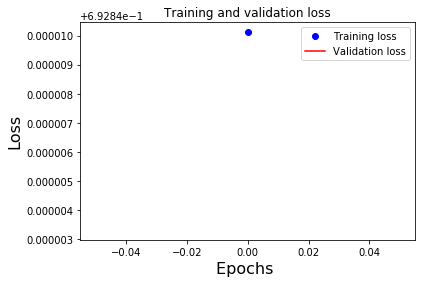

<Figure size 432x288 with 0 Axes>

Epoch: 2/50... Training loss: 0.6924 Validation loss: 0.6924


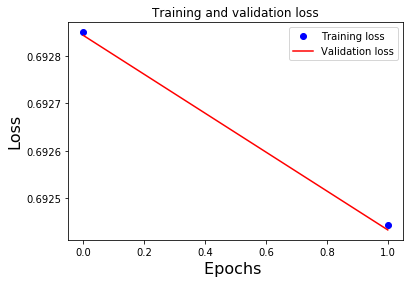

<Figure size 432x288 with 0 Axes>

Epoch: 3/50... Training loss: 0.6917 Validation loss: 0.6917


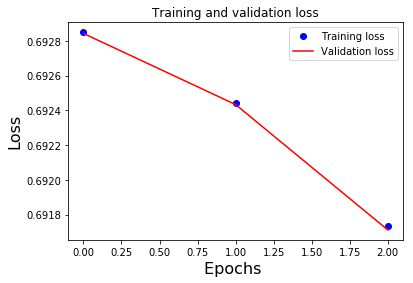

<Figure size 432x288 with 0 Axes>

Epoch: 4/50... Training loss: 0.6901 Validation loss: 0.6901


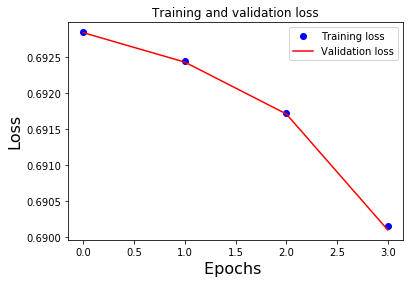

<Figure size 432x288 with 0 Axes>

Epoch: 5/50... Training loss: 0.6863 Validation loss: 0.6862


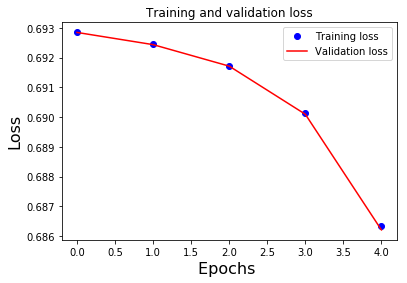

<Figure size 432x288 with 0 Axes>

Epoch: 6/50... Training loss: 0.6793 Validation loss: 0.6791


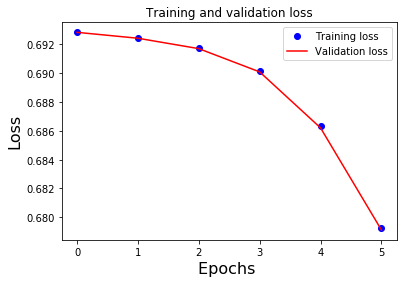

<Figure size 432x288 with 0 Axes>

Epoch: 7/50... Training loss: 0.6744 Validation loss: 0.6743


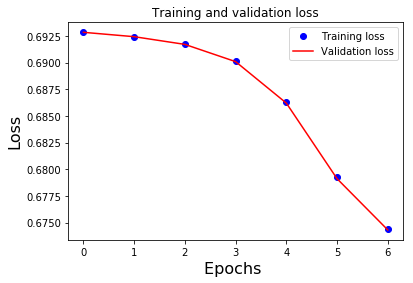

<Figure size 432x288 with 0 Axes>

Epoch: 8/50... Training loss: 0.6730 Validation loss: 0.6730


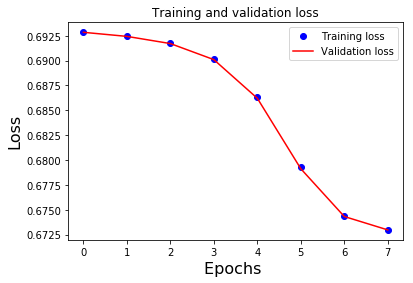

<Figure size 432x288 with 0 Axes>

Epoch: 9/50... Training loss: 0.6722 Validation loss: 0.6722


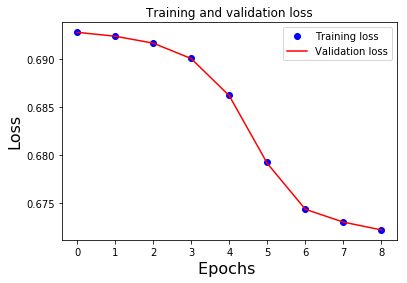

<Figure size 432x288 with 0 Axes>

Epoch: 10/50... Training loss: 0.6716 Validation loss: 0.6716


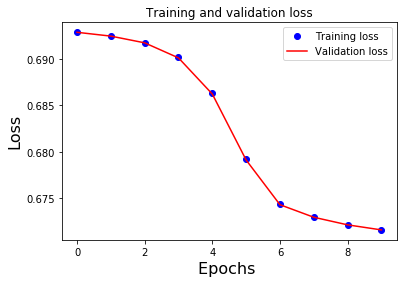

<Figure size 432x288 with 0 Axes>

Epoch: 11/50... Training loss: 0.6712 Validation loss: 0.6712


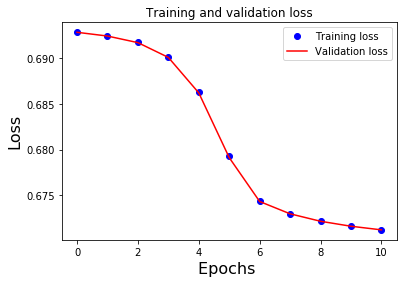

<Figure size 432x288 with 0 Axes>

Epoch: 12/50... Training loss: 0.6709 Validation loss: 0.6709


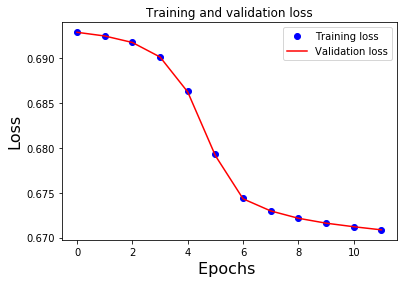

<Figure size 432x288 with 0 Axes>

Epoch: 13/50... Training loss: 0.6706 Validation loss: 0.6706


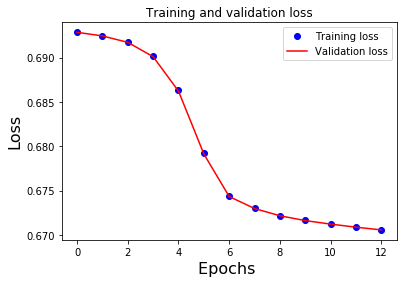

<Figure size 432x288 with 0 Axes>

Epoch: 14/50... Training loss: 0.6703 Validation loss: 0.6703


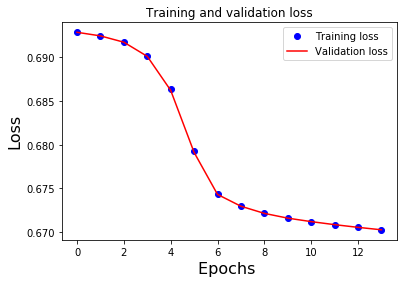

<Figure size 432x288 with 0 Axes>

Epoch: 15/50... Training loss: 0.6700 Validation loss: 0.6700


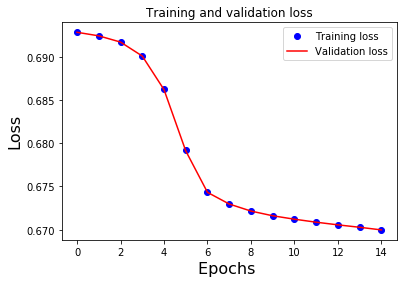

<Figure size 432x288 with 0 Axes>

Epoch: 16/50... Training loss: 0.6697 Validation loss: 0.6697


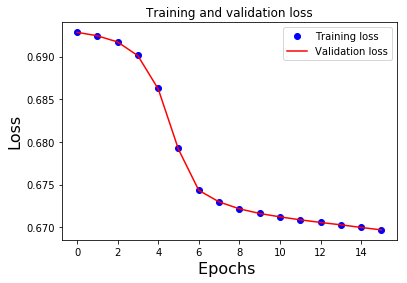

<Figure size 432x288 with 0 Axes>

Epoch: 17/50... Training loss: 0.6694 Validation loss: 0.6694


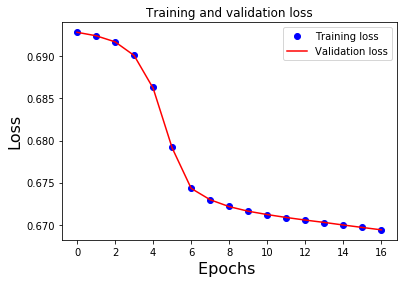

<Figure size 432x288 with 0 Axes>

Epoch: 18/50... Training loss: 0.6691 Validation loss: 0.6691


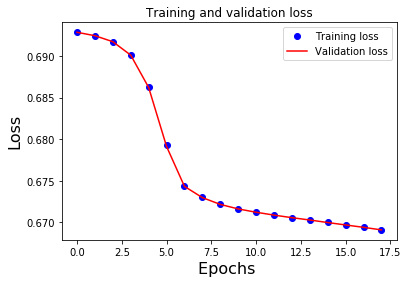

<Figure size 432x288 with 0 Axes>

Epoch: 19/50... Training loss: 0.6688 Validation loss: 0.6688


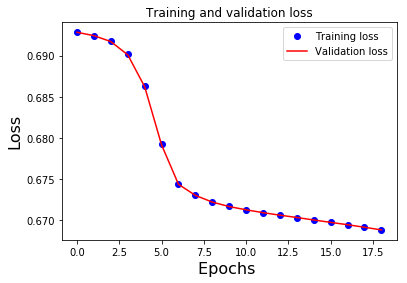

<Figure size 432x288 with 0 Axes>

Epoch: 20/50... Training loss: 0.6684 Validation loss: 0.6684


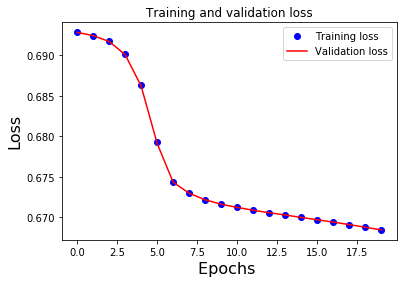

<Figure size 432x288 with 0 Axes>

Epoch: 21/50... Training loss: 0.6681 Validation loss: 0.6681


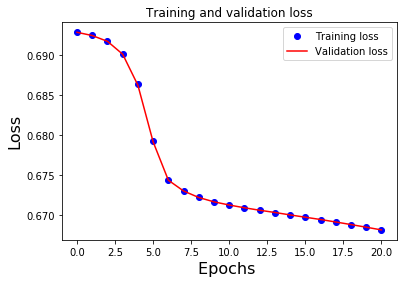

<Figure size 432x288 with 0 Axes>

Epoch: 22/50... Training loss: 0.6678 Validation loss: 0.6677


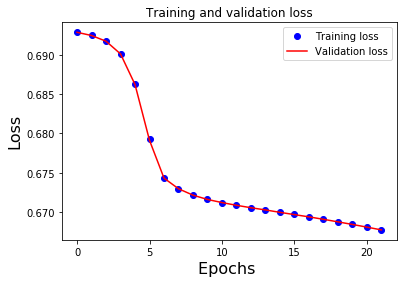

<Figure size 432x288 with 0 Axes>

Epoch: 23/50... Training loss: 0.6674 Validation loss: 0.6673


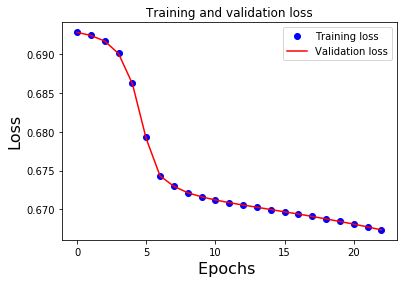

<Figure size 432x288 with 0 Axes>

Epoch: 24/50... Training loss: 0.6669 Validation loss: 0.6669


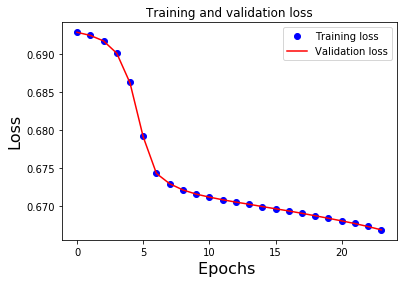

<Figure size 432x288 with 0 Axes>

Epoch: 25/50... Training loss: 0.6665 Validation loss: 0.6665


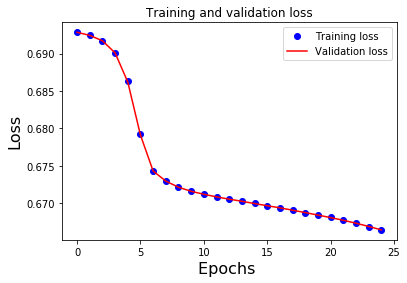

<Figure size 432x288 with 0 Axes>

Epoch: 26/50... Training loss: 0.6660 Validation loss: 0.6660


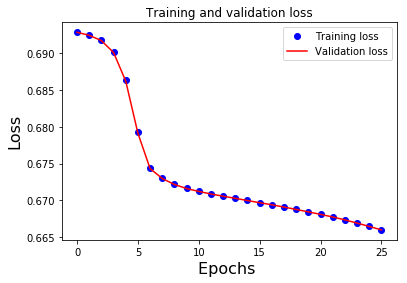

<Figure size 432x288 with 0 Axes>

Epoch: 27/50... Training loss: 0.6655 Validation loss: 0.6655


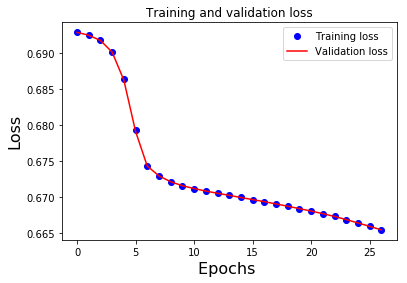

<Figure size 432x288 with 0 Axes>

Epoch: 28/50... Training loss: 0.6650 Validation loss: 0.6650


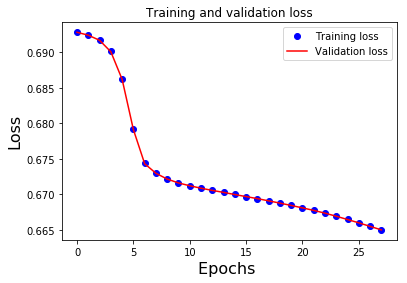

<Figure size 432x288 with 0 Axes>

Epoch: 29/50... Training loss: 0.6644 Validation loss: 0.6644


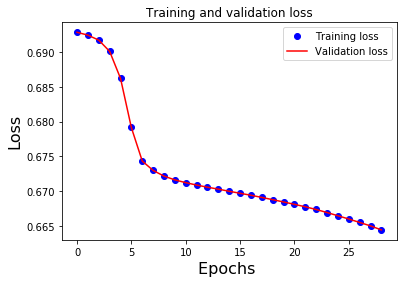

<Figure size 432x288 with 0 Axes>

Epoch: 30/50... Training loss: 0.6638 Validation loss: 0.6638


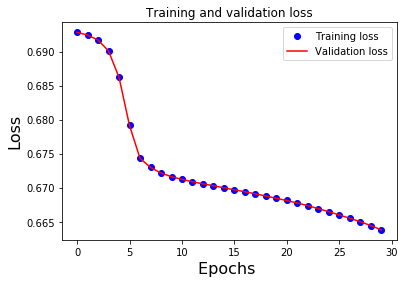

<Figure size 432x288 with 0 Axes>

Epoch: 31/50... Training loss: 0.6631 Validation loss: 0.6631


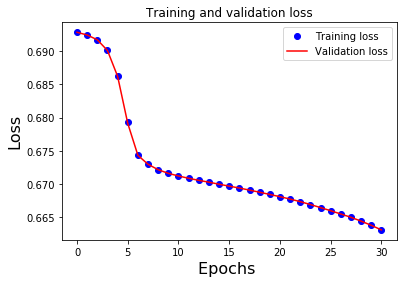

<Figure size 432x288 with 0 Axes>

Epoch: 32/50... Training loss: 0.6623 Validation loss: 0.6623


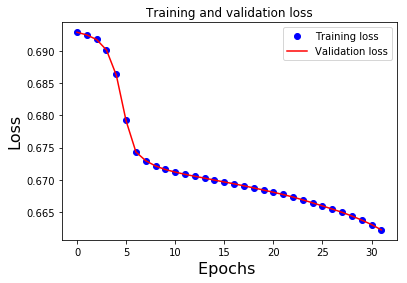

<Figure size 432x288 with 0 Axes>

Epoch: 33/50... Training loss: 0.6614 Validation loss: 0.6613


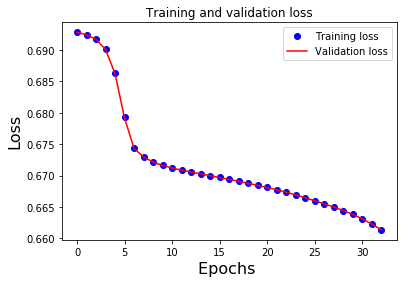

<Figure size 432x288 with 0 Axes>

Epoch: 34/50... Training loss: 0.6602 Validation loss: 0.6602


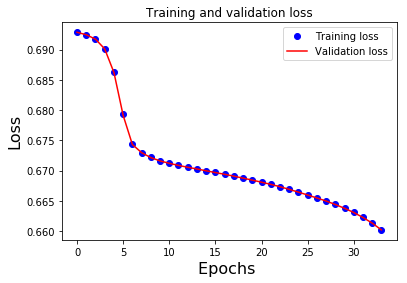

<Figure size 432x288 with 0 Axes>

Epoch: 35/50... Training loss: 0.6588 Validation loss: 0.6588


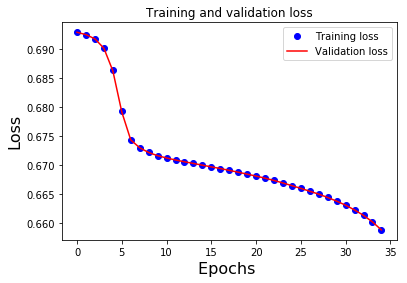

<Figure size 432x288 with 0 Axes>

Epoch: 36/50... Training loss: 0.6573 Validation loss: 0.6573


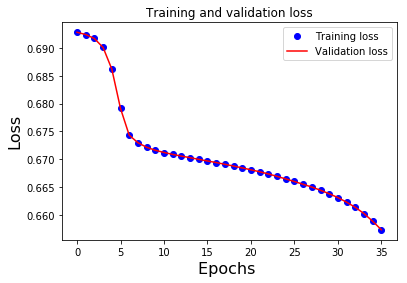

<Figure size 432x288 with 0 Axes>

Epoch: 37/50... Training loss: 0.6556 Validation loss: 0.6555


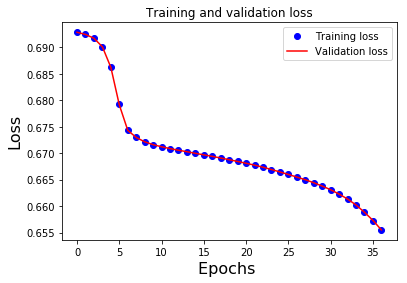

<Figure size 432x288 with 0 Axes>

Epoch: 38/50... Training loss: 0.6536 Validation loss: 0.6535


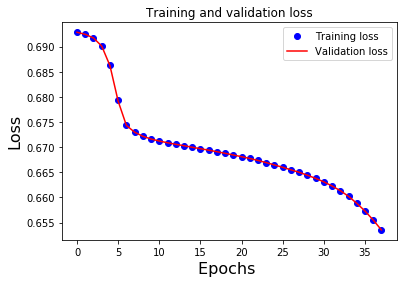

<Figure size 432x288 with 0 Axes>

Epoch: 39/50... Training loss: 0.6515 Validation loss: 0.6514


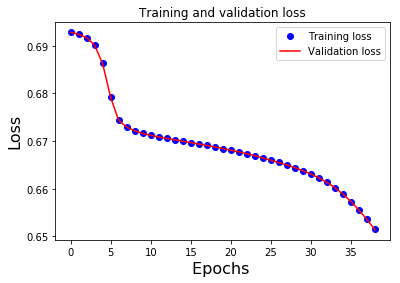

<Figure size 432x288 with 0 Axes>

Epoch: 40/50... Training loss: 0.6491 Validation loss: 0.6490


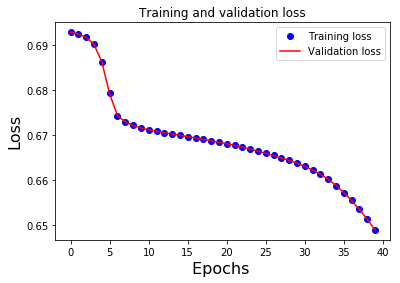

<Figure size 432x288 with 0 Axes>

Epoch: 41/50... Training loss: 0.6466 Validation loss: 0.6466


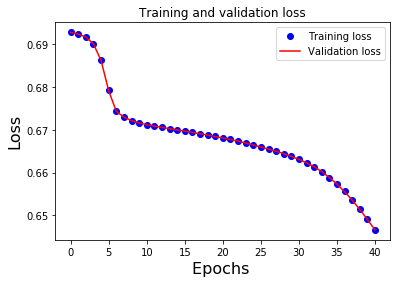

<Figure size 432x288 with 0 Axes>

Epoch: 42/50... Training loss: 0.6441 Validation loss: 0.6441


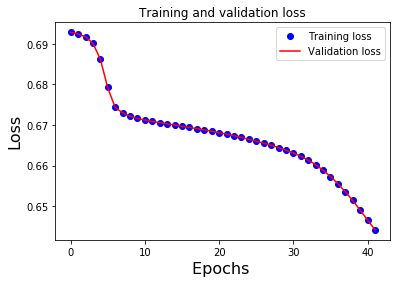

<Figure size 432x288 with 0 Axes>

Epoch: 43/50... Training loss: 0.6417 Validation loss: 0.6416


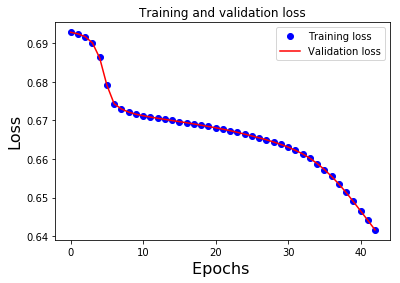

<Figure size 432x288 with 0 Axes>

Epoch: 44/50... Training loss: 0.6393 Validation loss: 0.6392


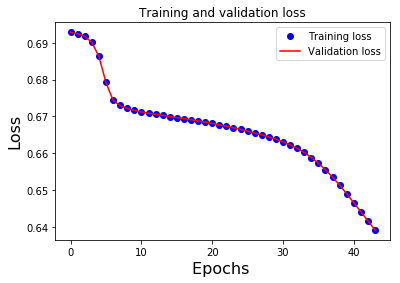

<Figure size 432x288 with 0 Axes>

Epoch: 45/50... Training loss: 0.6371 Validation loss: 0.6371


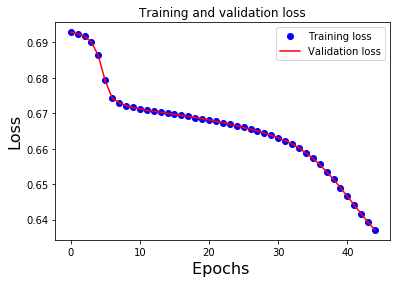

<Figure size 432x288 with 0 Axes>

Epoch: 46/50... Training loss: 0.6354 Validation loss: 0.6352


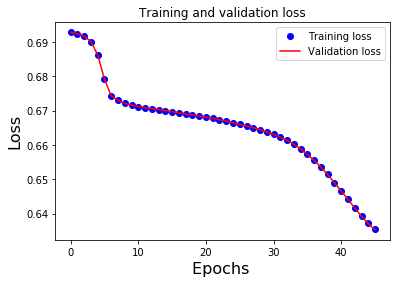

<Figure size 432x288 with 0 Axes>

Epoch: 47/50... Training loss: 0.6337 Validation loss: 0.6338


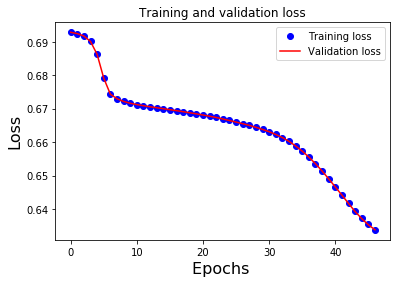

<Figure size 432x288 with 0 Axes>

Epoch: 48/50... Training loss: 0.6325 Validation loss: 0.6325


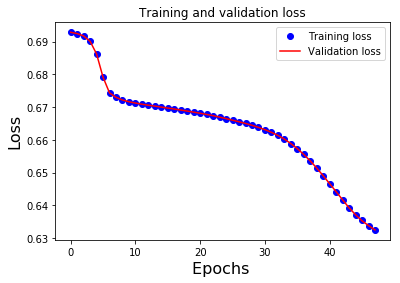

<Figure size 432x288 with 0 Axes>

Epoch: 49/50... Training loss: 0.6314 Validation loss: 0.6313


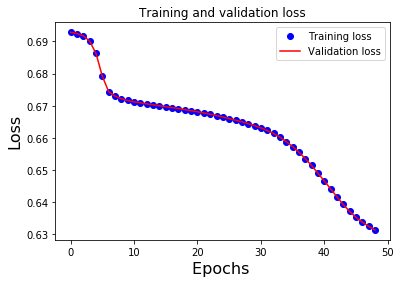

<Figure size 432x288 with 0 Axes>

Epoch: 50/50... Training loss: 0.6303 Validation loss: 0.6303


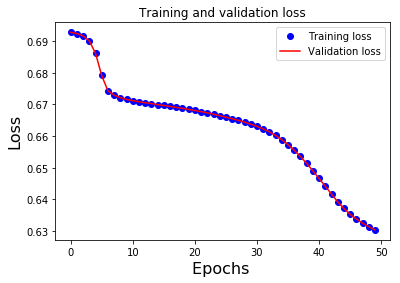

<Figure size 432x288 with 0 Axes>

Original Images


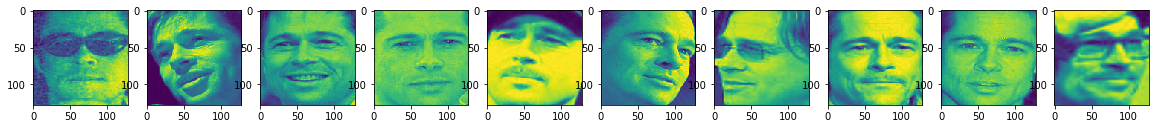

Noisy Images


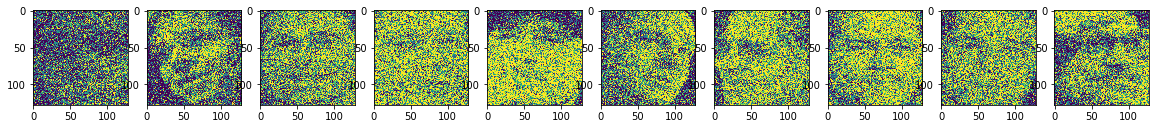

Reconstruction of Noisy Images


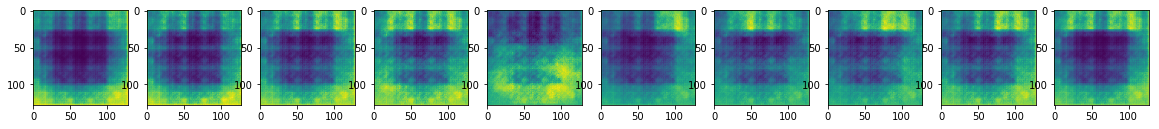

In [8]:
# Training

sess = tf.Session()
#tf.reset_default_graph()

saver = tf.train.Saver()
loss = []
valid_loss = []



display_step = 1
epochs = 50
batch_size = 50
#lr=[1e-3/(2**(i//5))for i in range(epochs)]
lr=1e-5
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs', sess.graph)
for e in range(epochs):
    for batch in range(len(training)//batch_size):
        batch_x = training[batch*batch_size:min((batch+1)*batch_size,len(training))]
        batch_test_x= test[batch*(10):min((batch+1)*(10),len(test))]
        #batch_x = mnist.train.next_batch(batch_size)
        #batch_test_x= mnist.test.next_batch(batch_size)
        imgs_test = batch_x.reshape((-1, 128, 128, 3))
        noise_factor = 0.2
        x_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape) 
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
        imgs = batch_x.reshape((-1, 128, 128, 3))
        x_train_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: x_train_noisy,
                                                         targets_: imgs,learning_rate:lr})
      
        batch_cost_test = sess.run(cost, feed_dict={inputs_: x_test_noisy,
                                                         targets_: imgs_test})
    if (e+1) % display_step == 0:
        print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost),
                 "Validation loss: {:.4f}".format(batch_cost_test))
   
    loss.append(batch_cost)
    valid_loss.append(batch_cost_test)
    plt.plot(range(e+1), loss, 'bo', label='Training loss')
    plt.plot(range(e+1), valid_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.legend()
    plt.figure()
    plt.show()
    saver.save(sess, 'encode_model') 

#batch_x= mnist.test.next_batch(10)
batch_x= test[1*10:min((1+1)*10,len(test))]
imgs = batch_x.reshape((-1, 128, 128, 3))
noise_factor = 0.5
x_test_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
recon_img = sess.run([decoded], feed_dict={inputs_: x_test_noisy})[0]
plt.figure(figsize=(20, 4))
plt.title('Reconstructed Images')
print("Original Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(imgs[i, ..., 0])#, cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0])#, cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(recon_img[i, ..., 0])#, cmap='gray')    
plt.show()    

writer.close()

sess.close()

In [9]:
training.shape

(2500, 128, 128, 3)

In [10]:
test.shape

(500, 128, 128, 3)